In [240]:
import json
import glob 


import pandas
import seaborn

import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import statsmodels.multivariate
import statsmodels.multivariate.pca
import statsmodels.multivariate.factor


In [181]:
pandas.set_option('display.float_format', lambda x: f'{x:,.6f}')

In [182]:
MODEL: str = "qwen2.5-7b"

In [184]:
raw: pandas.DataFrame = pandas.concat(
    [
        pandas.json_normalize(json.load(open(file))).assign(participant=n)
        for n, file in enumerate(glob.glob(f"data/base/{MODEL}/*.json", recursive=True))
    ],
)

In [185]:
pivoted: pandas.DataFrame = (
    raw
    .pipe(lambda _df: _df.assign(response=pandas.to_numeric(_df["response"], errors='coerce')))
    .pivot_table(
        values="response",
        index="participant",
        columns="id",
        aggfunc="first"
    )
)
pivoted

id,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
participant,,,,,,,,,,,,,,,,,,,,,
0,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
1,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000
2,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,...,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000
3,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000
4,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,4.000000,5.000000,3.000000,4.000000,3.000000,4.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,3.000000,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,3.000000,3.000000,5.000000,3.000000,4.000000,4.000000,3.000000,3.000000
246,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000
247,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000


In [186]:
pivoted.describe()

id,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
count,248.000000,250.000000,249.000000,248.000000,250.000000,250.000000,248.000000,249.000000,250.000000,250.000000,...,250.000000,250.000000,249.000000,248.000000,249.000000,250.000000,249.000000,249.000000,249.000000,249.000000
mean,3.846774,2.896000,3.763052,3.137097,3.480000,3.940000,4.088710,3.004016,3.664000,3.048000,...,3.712000,3.408000,3.546185,3.286290,4.337349,3.136000,3.803213,3.317269,3.799197,3.000000
std,0.493592,0.453881,0.453570,0.378248,0.516398,0.646585,0.501207,0.304509,0.489964,0.306712,...,0.624995,0.516336,0.530212,0.461793,0.723072,0.343476,0.455067,0.483334,0.439757,0.089803
min,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
25%,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000
50%,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,3.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000


In [ ]:
statsmodels.stats.descriptivestats.describe(pivoted)

id,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
nobs,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
missing,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
mean,3.846774,2.896000,3.763052,3.137097,3.480000,3.940000,4.088710,3.004016,3.664000,3.048000,...,3.712000,3.408000,3.546185,3.286290,4.337349,3.136000,3.803213,3.317269,3.799197,3.000000
std_err,0.031343,0.028706,0.028744,0.024019,0.032660,0.040894,0.031827,0.019297,0.030988,0.019398,...,0.039528,0.032656,0.033601,0.029324,0.045823,0.021723,0.028839,0.030630,0.027868,0.005691
upper_ci,3.908508,2.952537,3.819665,3.184405,3.544325,4.020542,4.151396,3.042024,3.725032,3.086205,...,3.789852,3.472317,3.612364,3.344047,4.427601,3.178785,3.860013,3.377597,3.854086,3.011209
lower_ci,3.785040,2.839463,3.706439,3.089789,3.415675,3.859458,4.026023,2.966008,3.602968,3.009795,...,3.634148,3.343683,3.480005,3.228534,4.247098,3.093215,3.746413,3.256941,3.744308,2.988791
std,0.493592,0.453881,0.453570,0.378248,0.516398,0.646585,0.501207,0.304509,0.489964,0.306712,...,0.624995,0.516336,0.530212,0.461793,0.723072,0.343476,0.455067,0.483334,0.439757,0.089803
iqr,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
iqr_normal,0.000000,0.000000,0.000000,0.000000,0.741301,0.000000,0.000000,0.000000,0.741301,0.000000,...,0.741301,0.741301,0.741301,0.741301,0.741301,0.000000,0.000000,0.741301,0.000000,0.000000
mad,0.355099,0.286720,0.379994,0.251626,0.506880,0.451200,0.316012,0.095998,0.454208,0.129856,...,0.541120,0.492864,0.513282,0.410965,0.644022,0.235008,0.354833,0.438316,0.346640,0.008032


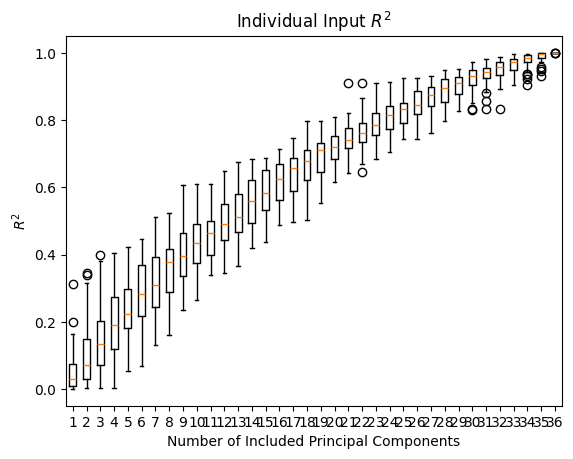

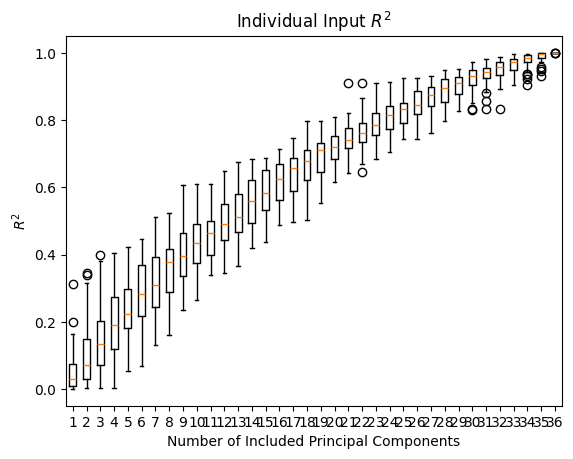

In [205]:
statsmodels.multivariate.pca.PCA(pivoted, missing="drop-row").plot_rsquare(ncomp=36)

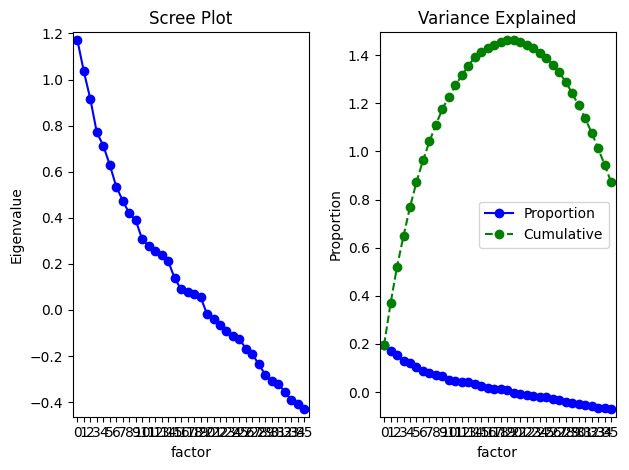

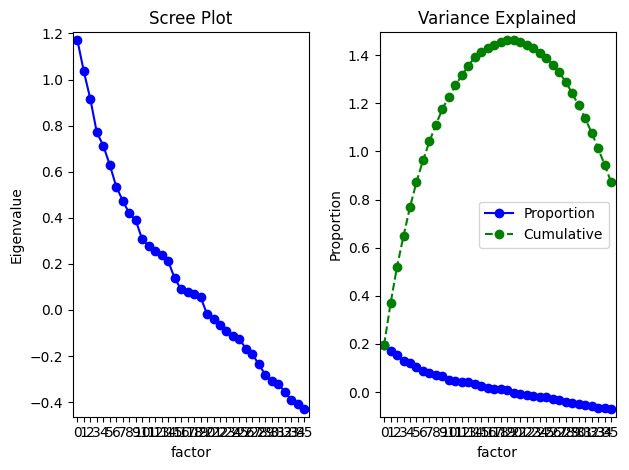

In [214]:
statsmodels.multivariate.factor.Factor(pivoted, n_factor=6).fit().plot_scree()

In [ ]:
print(
    pivoted
    .round(1)
    .to_csv(index=False, na_rep="NA")
)

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,4.0,3.0,3.0,5.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0
4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,3.0,4.0,4.0,3.0,3.0,2.0,5.0,3.0,4.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,4.0,3.0
4.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,3.0
4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,NA,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,3.0
3.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,5.0,3.0,4.0,3.0,4.0,3.0
4.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0
4.0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,3.0,3.

<Axes: xlabel='variable', ylabel='value'>

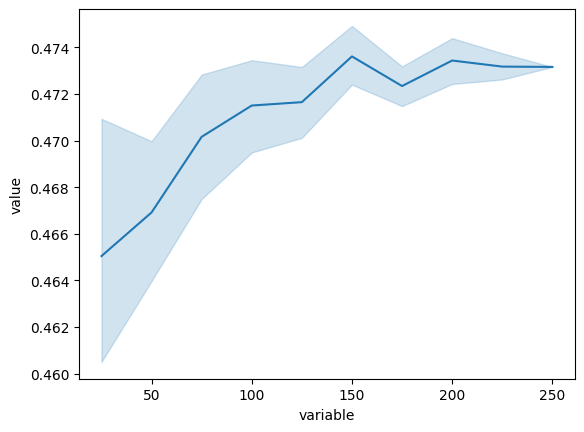

In [256]:
seaborn.lineplot(
    (
        pandas.DataFrame({
            n: [
                (
                    raw
                    .groupby("id")
                    .sample(n)
                    .pivot_table(
                        values="response",
                        columns="id",
                        aggfunc="std"
                    )
                    .T
                    .mean()
                ).values[0]
            for _ in range(25)
            ]
            for n in range(25, 251, 25)
        })
        .melt()
    ),
    x="variable",
    y="value"
)